In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

In [31]:
# Parameter
test_dir = "D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/dataset/test1"
batch_size = 64  
IMG_SIZE = (300, 300)
folds = 3  

# Import data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 300 images belonging to 3 classes.


In [32]:
# Initialize lists to store metrics
all_test_accuracies = []
conf_matrices = []
histories = []

c:\Users\CATUR WARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.9666 - loss: 0.0933 - precision: 0.9666 - recall: 0.9666
Fold 1 - Test Accuracy: 0.949999988079071
Fold 1 - Test Loss: 0.16066180169582367
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step
              precision    recall  f1-score   support

     Manggis       1.00      1.00      1.00       100
      Pisang       0.98      0.87      0.92       100
    Rambutan       0.88      0.98      0.93       100

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

Metrics for Fold 1
      Class   TP  FN  FP   TN
0   Manggis  100   0   0  200
1    Pisang   87  13   2  198
2  Rambutan   98   2  13  187


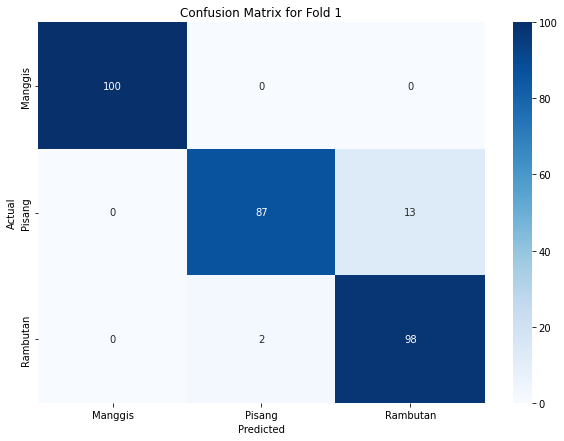

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - accuracy: 0.9764 - loss: 0.0717 - precision_1: 0.9764 - recall_1: 0.9764 
Fold 2 - Test Accuracy: 0.9566666483879089
Fold 2 - Test Loss: 0.14413921535015106
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step
              precision    recall  f1-score   support

     Manggis       1.00      1.00      1.00       100
      Pisang       0.94      0.93      0.93       100
    Rambutan       0.93      0.94      0.94       100

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Metrics for Fold 2
      Class   TP  FN  FP   TN
0   Manggis  100   0   0  200
1    Pisang   93   7   6  194
2  Rambutan   94   6   7  193


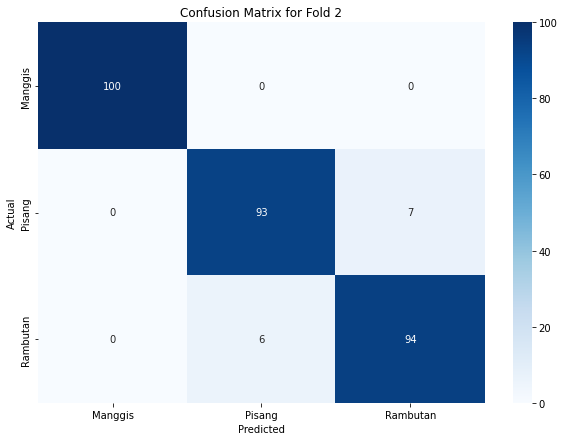

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step - accuracy: 0.9807 - loss: 0.0699 - precision_2: 0.9807 - recall_2: 0.9807
Fold 3 - Test Accuracy: 0.949999988079071
Fold 3 - Test Loss: 0.16821324825286865
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step
              precision    recall  f1-score   support

     Manggis       1.00      1.00      1.00       100
      Pisang       0.88      0.98      0.93       100
    Rambutan       0.98      0.87      0.92       100

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

Metrics for Fold 3
      Class   TP  FN  FP   TN
0   Manggis  100   0   0  200
1    Pisang   98   2  13  187
2  Rambutan   87  13   2  198


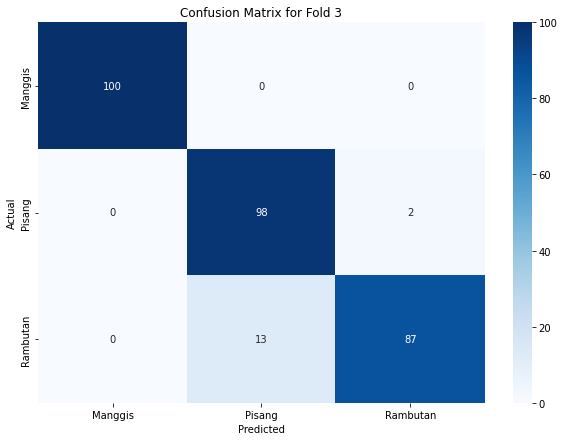

In [33]:
for fold in range(1, folds + 1):
    # Load model
    model_path = f"D:/kuliah/Tugas Akhir/Code/Klasifikasi Jenis Buah Lokal/models/K-Fold Cross Validation/CNN-RGB_fold_{fold}.h5"
    model = load_model(model_path)

    # Evaluate the model using the test data
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)
    all_test_accuracies.append(test_accuracy)

    print(f"Fold {fold} - Test Accuracy: {test_accuracy}")
    print(f"Fold {fold} - Test Loss: {test_loss}")

    # Predictions
    test_generator.reset()
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    conf_matrices.append(cm)

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
    print(report)

    # Save history
    histories.append(model.history.history)

    # Calculate TP, FN, TN, FP
    TP = np.diag(cm)
    FN = np.sum(cm, axis=1) - TP
    FP = np.sum(cm, axis=0) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    metrics_df = pd.DataFrame({
        'Class': test_generator.class_indices.keys(),
        'TP': TP,
        'FN': FN,
        'FP': FP,
        'TN': TN
    })
    
    print(f"Metrics for Fold {fold}")
    print(metrics_df)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.show()

    
    
    

In [34]:
# Average test accuracy
average_test_accuracy = np.mean(all_test_accuracies)
print(f"\nAverage Test Accuracy: {average_test_accuracy}")


Average Test Accuracy: 0.952222208182017
